In [ ]:
pip install pandas numpy matplotlib seaborn scikit-learn


##Data Exploration and Cleaning

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('healthcare_dataset.csv')

# Display basic information and statistics
print(df.info())
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Handle missing values (e.g., fill with mean or drop)
df['Billing Amount'].fillna(df['Billing Amount'].mean(), inplace=True)
df.dropna(subset=['Medical Condition'], inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

##Patient Demographics and Trends

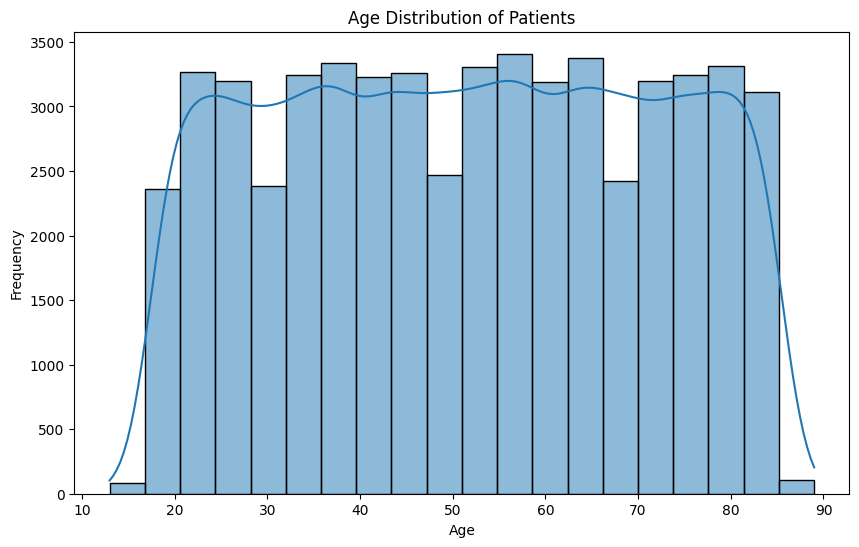

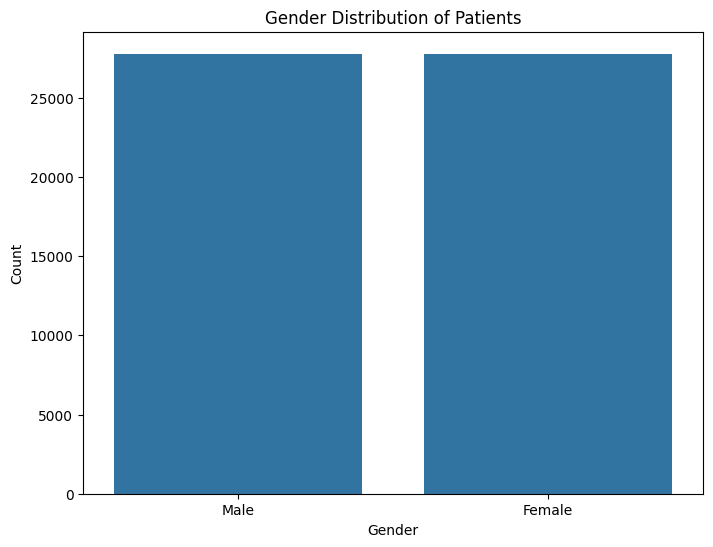

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Age and Gender Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution of Patients')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


##Hospital and Doctor Performance

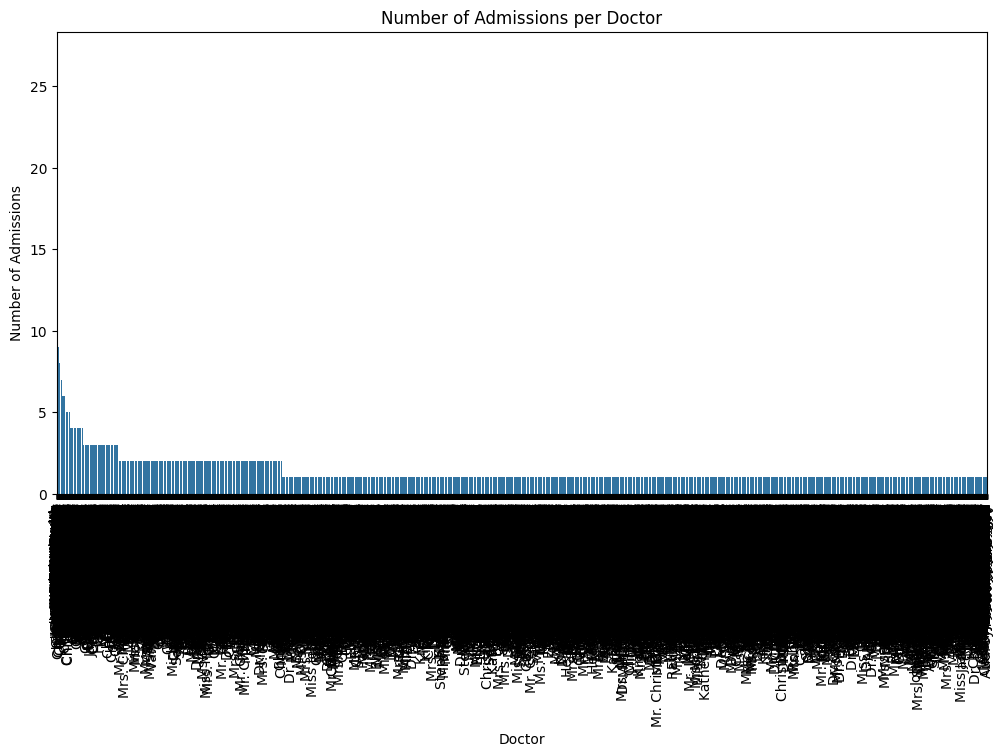

In [ ]:
# Doctor Performance
doctor_performance = df['Doctor'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=doctor_performance.index, y=doctor_performance.values)
plt.title('Number of Admissions per Doctor')
plt.xlabel('Doctor')
plt.ylabel('Number of Admissions')
plt.xticks(rotation=90)
plt.show()

# Hospital Comparison
hospital_comparison = df.groupby('Hospital')['Billing Amount'].mean().sort_values()
plt.figure(figsize=(12, 6))
sns.barplot(x=hospital_comparison.index, y=hospital_comparison.values)
plt.title('Average Billing Amount per Hospital')
plt.xlabel('Hospital')
plt.ylabel('Average Billing Amount')
plt.xticks(rotation=90)
plt.show()


##Billing and Financial Analysis

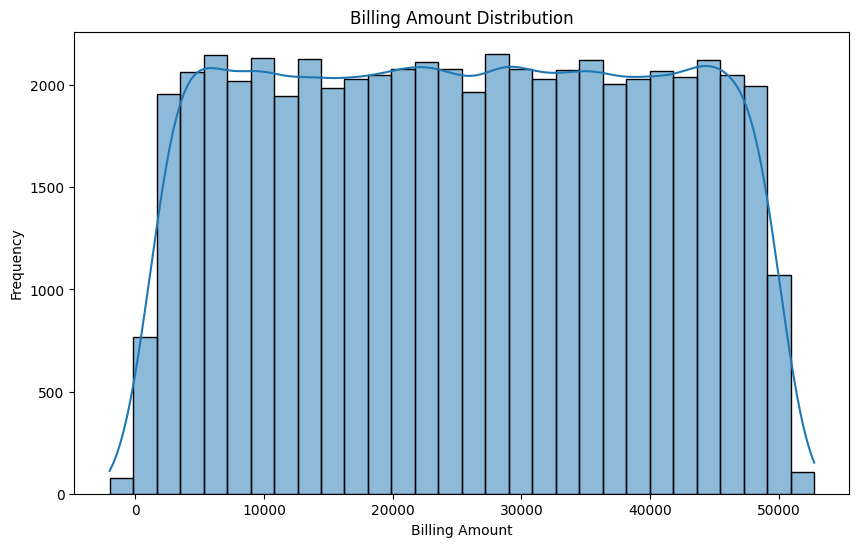

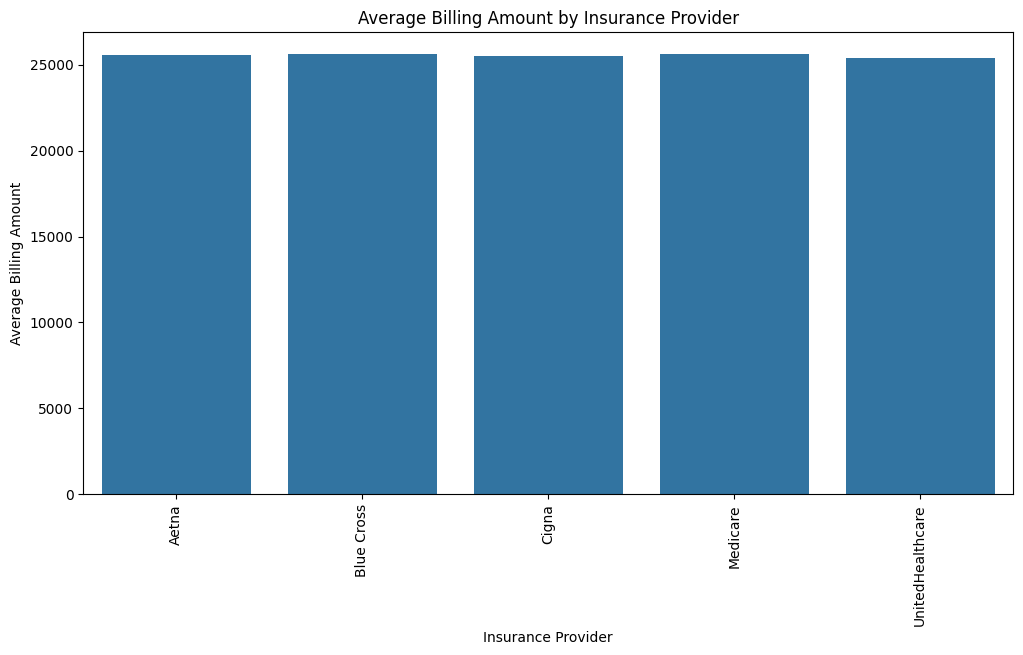

In [ ]:
# Billing Trends
plt.figure(figsize=(10, 6))
sns.histplot(df['Billing Amount'], bins=30, kde=True)
plt.title('Billing Amount Distribution')
plt.xlabel('Billing Amount')
plt.ylabel('Frequency')
plt.show()

# Insurance Provider Analysis
insurance_comparison = df.groupby('Insurance Provider')['Billing Amount'].mean()
plt.figure(figsize=(12, 6))
sns.barplot(x=insurance_comparison.index, y=insurance_comparison.values)
plt.title('Average Billing Amount by Insurance Provider')
plt.xlabel('Insurance Provider')
plt.ylabel('Average Billing Amount')
plt.xticks(rotation=90)
plt.show()


##Admission and Discharge Patterns

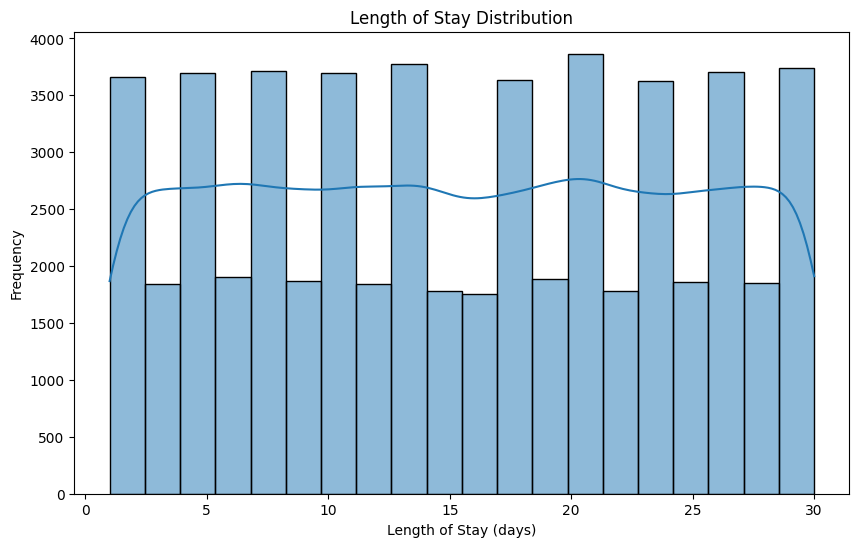

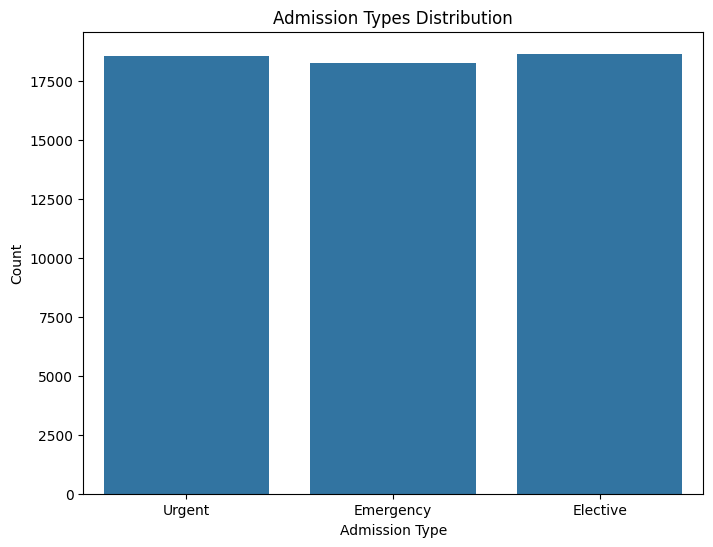

In [ ]:
# Calculate Length of Stay
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])
df['Length of Stay'] = (df['Discharge Date'] - df['Date of Admission']).dt.days

# Length of Stay Analysis
plt.figure(figsize=(10, 6))
sns.histplot(df['Length of Stay'], bins=20, kde=True)
plt.title('Length of Stay Distribution')
plt.xlabel('Length of Stay (days)')
plt.ylabel('Frequency')
plt.show()

# Admission Types
plt.figure(figsize=(8, 6))
sns.countplot(x='Admission Type', data=df)
plt.title('Admission Types Distribution')
plt.xlabel('Admission Type')
plt.ylabel('Count')
plt.show()


##Predictive Modeling

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Prepare data for modeling
df['Age'].fillna(df['Age'].mean(), inplace=True)  # Handle missing values
X = df[['Age']]  # Features
y = df['Billing Amount']  # Target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 199022401.2285699


##Interactive Visualization

In [13]:
import plotly.express as px

# Create an interactive scatter plot of Age vs. Billing Amount
fig = px.scatter(df, x='Age', y='Billing Amount', color='Gender', title='Age vs. Billing Amount')
fig.show()
